# Small Image Classification Using Convolutional Neural Network (CNN)

we will classify small images cifar10 dataset from tensorflow keras datasets. There are total 10 classes as shown below. We will use CNN for classification
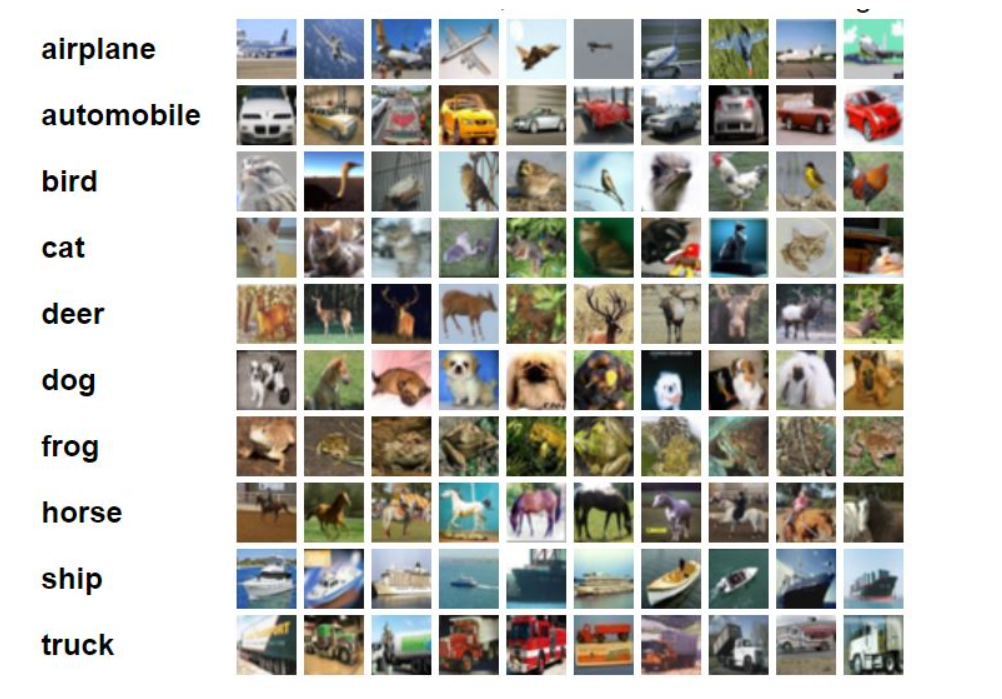

In [1]:
!pip install numpy

In [2]:
import numpy as np

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

In [6]:
!pip install tensorflow

  Using cached tensorflow-2.5.0-cp38-cp38-win_amd64.whl (422.6 MB)


In [7]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np

Load the dataset

In [8]:
(X_train, y_train), (X_test,y_test) = datasets.cifar10.load_data()
X_train.shape

170500096/170498071 [==============================] - 274s 2us/step


(50000, 32, 32, 3)

In [9]:
X_test.shape

(10000, 32, 32, 3)

Here we see there are 50000 training images and 1000 test images

In [10]:
y_train.shape

(50000, 1)

In [11]:
y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [12]:
y_train = y_train.reshape(-1,)
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [13]:
y_test = y_test.reshape(-1,)

In [14]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

Let's plot some images to see what they are

In [15]:
def plot_sample(X, y, index):
    plt.figure(figsize = (15,2))
    plt.imshow(X[index])
    plt.xlabel(classes[y[index]])

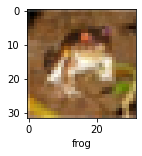

In [16]:
plot_sample(X_train, y_train, 0)

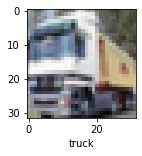

In [17]:
plot_sample(X_train, y_train, 1)

Normalize the images to a number from 0 to 1. Image has 3 channels (R,G,B) and each value in the channel can range from 0 to 255. Hence to normalize in 0-->1 range, we need to divide it by 255

Normalizing the training data

In [19]:
X_train = X_train / 255.0
X_test = X_test / 255.0

Build simple artificial neural network for image classification

In [20]:
ann = models.Sequential([
        layers.Flatten(input_shape=(32,32,3)),
        layers.Dense(3000, activation='relu'),
        layers.Dense(1000, activation='relu'),
        layers.Dense(10, activation='sigmoid')    
    ])

ann.compile(optimizer='SGD',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

ann.fit(X_train, y_train, epochs=5)

Epoch 1/5
1563/1563 [==============================] - 95s 60ms/step - loss: 1.8192 - accuracy: 0.3541
Epoch 2/5
1563/1563 [==============================] - 95s 61ms/step - loss: 1.6283 - accuracy: 0.4279
Epoch 3/5
1563/1563 [==============================] - 99s 63ms/step - loss: 1.5464 - accuracy: 0.4567
Epoch 4/5
1563/1563 [==============================] - 104s 66ms/step - loss: 1.4859 - accuracy: 0.4754
Epoch 5/5
1563/1563 [==============================] - 102s 65ms/step - loss: 1.4331 - accuracy: 0.4962


You can see that at the end of 5 epochs, accuracy is at around 49.62%

In [21]:
from sklearn.metrics import confusion_matrix , classification_report
import numpy as np
y_pred = ann.predict(X_test)
y_pred_classes = [np.argmax(element) for element in y_pred]

print("Classification Report: \n", classification_report(y_test, y_pred_classes))

Classification Report: 
               precision    recall  f1-score   support

           0       0.55      0.47      0.51      1000
           1       0.63      0.56      0.59      1000
           2       0.38      0.30      0.33      1000
           3       0.36      0.26      0.31      1000
           4       0.48      0.34      0.39      1000
           5       0.38      0.39      0.38      1000
           6       0.38      0.77      0.51      1000
           7       0.64      0.45      0.53      1000
           8       0.46      0.75      0.57      1000
           9       0.66      0.43      0.52      1000

    accuracy                           0.47     10000
   macro avg       0.49      0.47      0.47     10000
weighted avg       0.49      0.47      0.47     10000



Now let us build a convolutional neural network to train our images

In [22]:
cnn = models.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

In [23]:
cnn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [24]:
cnn.fit(X_train, y_train, epochs=10)

Epoch 1/10
1563/1563 [==============================] - 36s 23ms/step - loss: 1.4762 - accuracy: 0.4686
Epoch 2/10
1563/1563 [==============================] - 36s 23ms/step - loss: 1.1239 - accuracy: 0.6040
Epoch 3/10
1563/1563 [==============================] - 37s 24ms/step - loss: 0.9873 - accuracy: 0.6578
Epoch 4/10
1563/1563 [==============================] - 41s 26ms/step - loss: 0.9033 - accuracy: 0.6856
Epoch 5/10
1563/1563 [==============================] - 42s 27ms/step - loss: 0.8351 - accuracy: 0.7135
Epoch 6/10
1563/1563 [==============================] - 41s 26ms/step - loss: 0.7819 - accuracy: 0.7276
Epoch 7/10
1563/1563 [==============================] - 41s 26ms/step - loss: 0.7316 - accuracy: 0.7463
Epoch 8/10
1563/1563 [==============================] - 41s 26ms/step - loss: 0.6836 - accuracy: 0.7613
Epoch 9/10
1563/1563 [==============================] - 43s 27ms/step - loss: 0.6419 - accuracy: 0.7756
Epoch 10/10
1563/1563 [==============================] - 43s 28m

With CNN, at the end 5 epochs, accuracy was at around 79.00% which is a significant improvement over ANN. CNN's are best for image classification and gives superb accuracy. Also computation is much less compared to simple ANN as maxpooling reduces the image dimensions while still preserving the features

In [25]:
cnn.evaluate(X_test,y_test)

313/313 [==============================] - 3s 8ms/step - loss: 0.9279 - accuracy: 0.7010


[0.9279158115386963, 0.7009999752044678]

In [26]:
y_pred = cnn.predict(X_test)
y_pred[:5]

array([[3.5251400e-05, 4.1862577e-03, 7.4758929e-05, 9.5625520e-01,
        1.2596401e-04, 2.8866032e-02, 1.2124594e-03, 6.2031936e-06,
        9.2105139e-03, 2.7507309e-05],
       [9.0604485e-04, 1.1237875e-01, 9.7975817e-07, 1.6740087e-07,
        1.1571748e-07, 1.4926581e-08, 4.7655289e-09, 8.9897290e-09,
        8.8668823e-01, 2.5712787e-05],
       [3.1086290e-01, 5.2783351e-02, 6.2802439e-03, 4.2497520e-03,
        4.6461490e-03, 3.3924234e-04, 1.0736518e-03, 1.1992269e-03,
        6.1649376e-01, 2.0717632e-03],
       [9.0407574e-01, 2.3679551e-02, 1.2813218e-02, 4.0680729e-03,
        1.4596783e-02, 2.0849775e-05, 7.0563015e-05, 1.4918942e-04,
        4.0402941e-02, 1.2304308e-04],
       [1.0991058e-08, 1.6652262e-05, 5.7172641e-02, 4.4800062e-02,
        3.0297479e-01, 2.8701138e-04, 5.9471959e-01, 3.6244614e-08,
        2.8773955e-05, 3.5621406e-07]], dtype=float32)

In [27]:
y_classes = [np.argmax(element) for element in y_pred]
y_classes[:5]

[3, 8, 8, 0, 6]

In [28]:
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

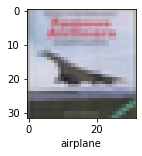

In [29]:
plot_sample(X_test, y_test,3)

In [30]:
classes[y_classes[3]]

'airplane'